## Import Modules

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules

from typing import Union, NoReturn
from IPython.display import display

## Read Dataset

In [2]:
data = pd.read_csv('datasets/groceries.csv')
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Preprocessing

### Rename Columns

In [3]:
data.rename(
    columns={
        'Member_number': 'id',
        'Date': 'date',
        'itemDescription': 'item'
    },
    inplace=True
)

### Date Information

In [4]:
data.date = pd.to_datetime(data.date)

data['day'] = data.date.dt.day
data['year'] = data.date.dt.year
data['weekday'] = data.date.dt.weekday

In [5]:
data

,id,date,item,day,year,weekday
0,1808,2015-07-21,tropical fruit,21,2015,1
1,2552,2015-05-01,whole milk,1,2015,4
2,2300,2015-09-19,pip fruit,19,2015,5
3,1187,2015-12-12,other vegetables,12,2015,5
4,3037,2015-01-02,whole milk,2,2015,4
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,10,2014,6
38761,2022,2014-02-23,candy,23,2014,6
38762,1097,2014-04-16,cake bar,16,2014,2
38763,1510,2014-03-12,fruit/vegetable juice,12,2014,2


## EDA

### The Most Popular Items

In [6]:
items = data.item.value_counts().reset_index()
items.rename(
    columns={
        'item': 'count',
        'index': 'item',
    },
    inplace=True
)

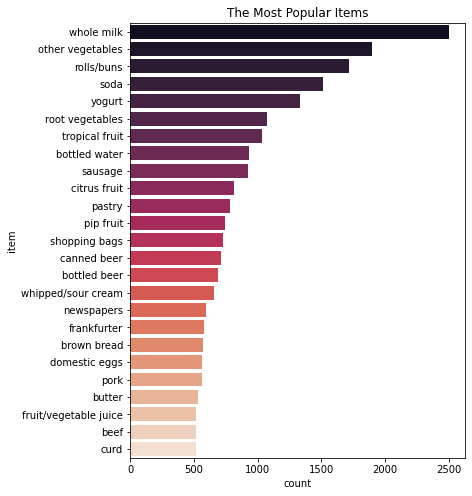

In [7]:
fig = plt.figure(figsize=(6, 8))
sns.barplot(
    x='count',
    y='item',
    data=items[:25],
    orient='h',
    palette='rocket'
)
plt.title('The Most Popular Items')
plt.show()

### Word Cloud

(-0.5, 1199.5, 1199.5, -0.5)

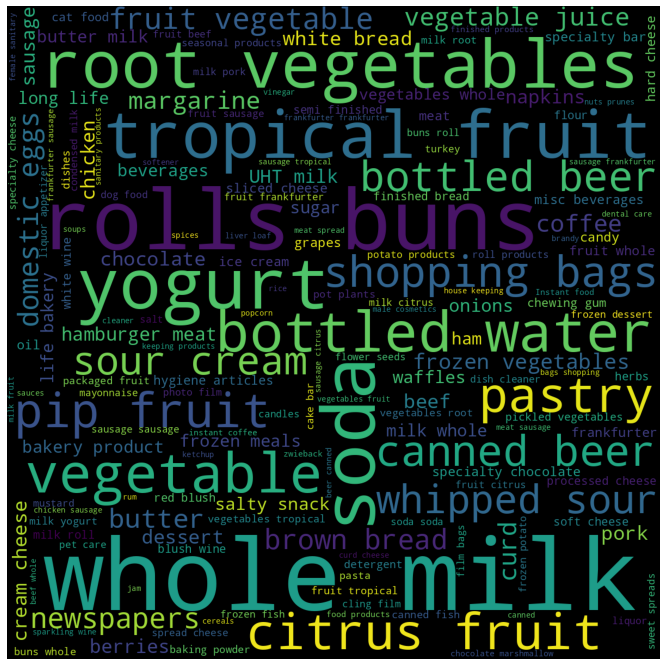

In [8]:
fig = plt.figure(figsize=(12, 12))

cloud = WordCloud(
    max_words=len(items),
    width=1200,
    height=1200,
).generate(text=', '.join(data.item))

plt.imshow(cloud)
plt.axis('off')

### Transactions By Day, Weekday

In [9]:
by_weekday = data.groupby(['id', 'date']).agg({'weekday': lambda x: x.unique()})

Text(0.5, 1.0, 'Transactions By Weekday')

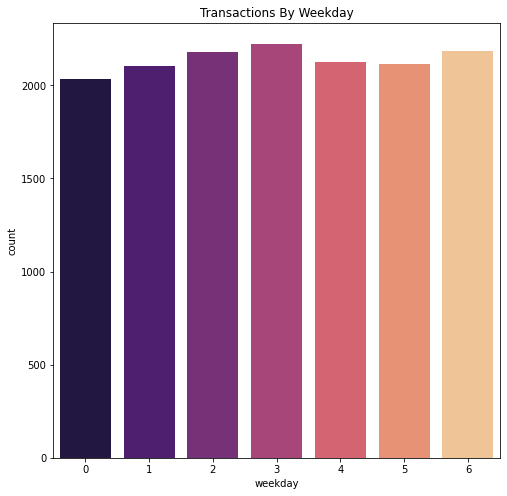

In [10]:
plt.figure(figsize=(8, 8))
sns.countplot(x='weekday', data=by_weekday, palette='magma')
plt.title('Transactions By Weekday')

In [11]:
by_day = data.groupby('day').item.count().reset_index()

Text(0.5, 1.0, 'Cummulative day transactions')

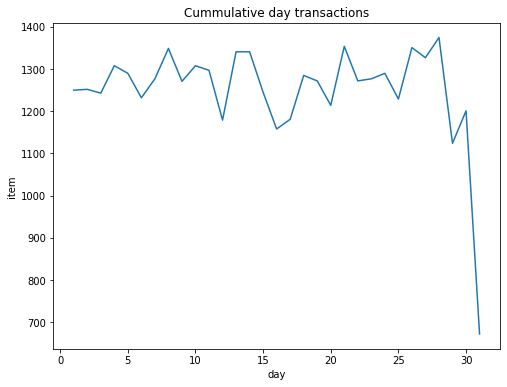

In [12]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='day', y='item', data=by_day)
plt.title('Cummulative day transactions')

### Customers Activity

Text(0.5, 1.0, 'Customers')

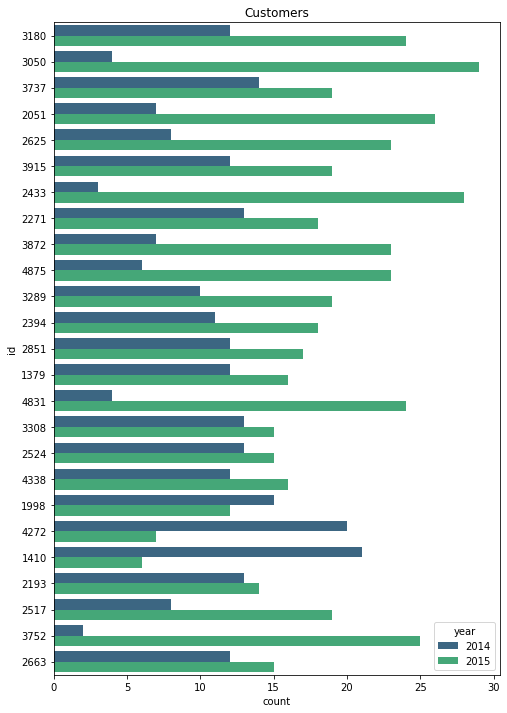

In [13]:
plt.figure(figsize=(8, 12))
sns.countplot(
    y='id', hue='year',
    data=data,
    order=data.id.value_counts().index[:25],
    palette='viridis'
)
plt.title('Customers')

## Association Rule Mining

### Create Transactions

In [14]:
transactions = [
    transaction[1].item.tolist()
    for transaction in data.groupby(['id', 'date'])
]
transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

### Encode Items

In [15]:
encoder = TransactionEncoder()
encoded_trans = encoder.fit_transform(transactions)

trans_matrix = pd.DataFrame(
    data=encoded_trans,
    columns=encoder.columns_
)
trans_matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Choose Min Support And Min Confidence

In [16]:
class FindMetricThreshold():
    
    def __init__(self, data: pd.DataFrame, min_support: Union[list[float], np.ndarray], metric: str = 'confidence', min_threshold: Union[list[float], np.ndarray] = None, algorithm: str = 'fpgrowth'):    
        self.data = data
        self.min_support = min_support
        self.metric = metric
        self.min_threshold = min_threshold
        self.algorithm = apriori if algorithm == 'apriori' else fpgrowth
    
    def grid_search(self) -> np.ndarray:
        rules_matrix = np.zeros((len(self.min_support), len(self.min_threshold)))

        for i, support in enumerate(self.min_support):
            for j, threshold in enumerate(self.min_threshold):

                frequent_itemsets = self.algorithm(
                    df=self.data,
                    min_support=support
                )
                rules = association_rules(
                    df=frequent_itemsets,
                    metric=self.metric,
                    min_threshold=threshold
                )
                rules_matrix[i, j] = len(rules)

        self.rules_matrix = rules_matrix
        return rules_matrix
    
    def plot_metrics(self) -> NoReturn:
        fig = plt.figure(figsize=(8, 8))

        for row in self.rules_matrix:
            plt.plot(self.min_threshold, row, 'o-')

        plt.legend([
            'Support {:.2%}'.format(level)
            for level in self.min_support
        ])
        plt.grid(True)

        plt.xlabel(self.metric.title())
        plt.ylabel('Number of Rules')
        
        plt.savefig('Min Threshold Search.png')

In [17]:
min_support = [4e-3, 2e-3, 1.2e-3, 8e-4]
metric = 'lift' # 'confidence' # 
min_theshold = [1, 1.25, 1.5, 1.75, 2] # [0.15, 0.125, 0.1] #

In [18]:
# %%timeit
metrics = FindMetricThreshold(
    data=trans_matrix,
    min_support=min_support,
    metric=metric,
    min_threshold=min_theshold
)
metrics.grid_search()

array([[  8.,   0.,   0.,   0.,   0.],
       [ 36.,   4.,   0.,   0.,   0.],
       [164.,  38.,  12.,   4.,   2.],
       [382., 126.,  34.,   8.,   4.]])

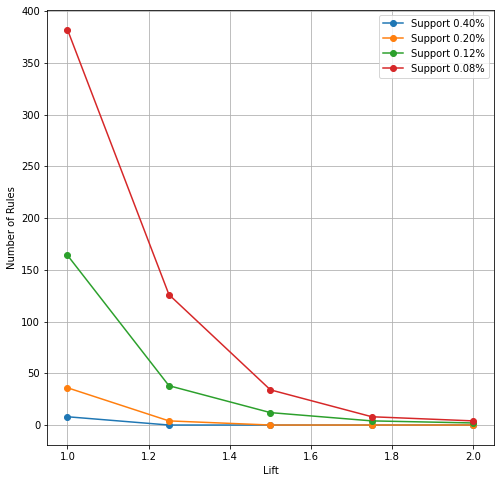

In [19]:
metrics.plot_metrics()

In [20]:
min_support = 0.0012
metric = 'confidence'
min_threshold = 0.125

### Mine Rules

In [21]:
frequent_itemsets = fpgrowth(
    df=trans_matrix,
    min_support=min_support,
    use_colnames=True,
)
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(len)

In [22]:
frequent_itemsets

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.051728,(pastry),1
2,0.018780,(salty snack),1
3,0.085879,(yogurt),1
4,0.060349,(sausage),1
...,...,...,...
618,0.001738,"(other vegetables, waffles)",2
619,0.001337,"(waffles, root vegetables)",2
620,0.001671,"(whole milk, cat food)",2
621,0.001671,"(whole milk, chewing gum)",2


In [23]:
rules = association_rules(
    df=frequent_itemsets,
    metric=metric,
    min_threshold=min_threshold
)

In [24]:
rules.sort_values(
    by='lift',
    ascending=False
).reset_index(drop=True).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
2,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
3,(soft cheese),(yogurt),0.010025,0.085879,0.001270,0.126667,1.474952,0.000409,1.046704
4,(processed cheese),(rolls/buns),0.010158,0.110005,0.001470,0.144737,1.315734,0.000353,1.040610
5,(packaged fruit/vegetables),(rolls/buns),0.008488,0.110005,0.001203,0.141732,1.288421,0.000269,1.036967
6,(red/blush wine),(rolls/buns),0.010493,0.110005,0.001337,0.127389,1.158028,0.000182,1.019922
7,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
8,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
9,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701


## Anylize Results of Mining

### Find correlation between different metrics

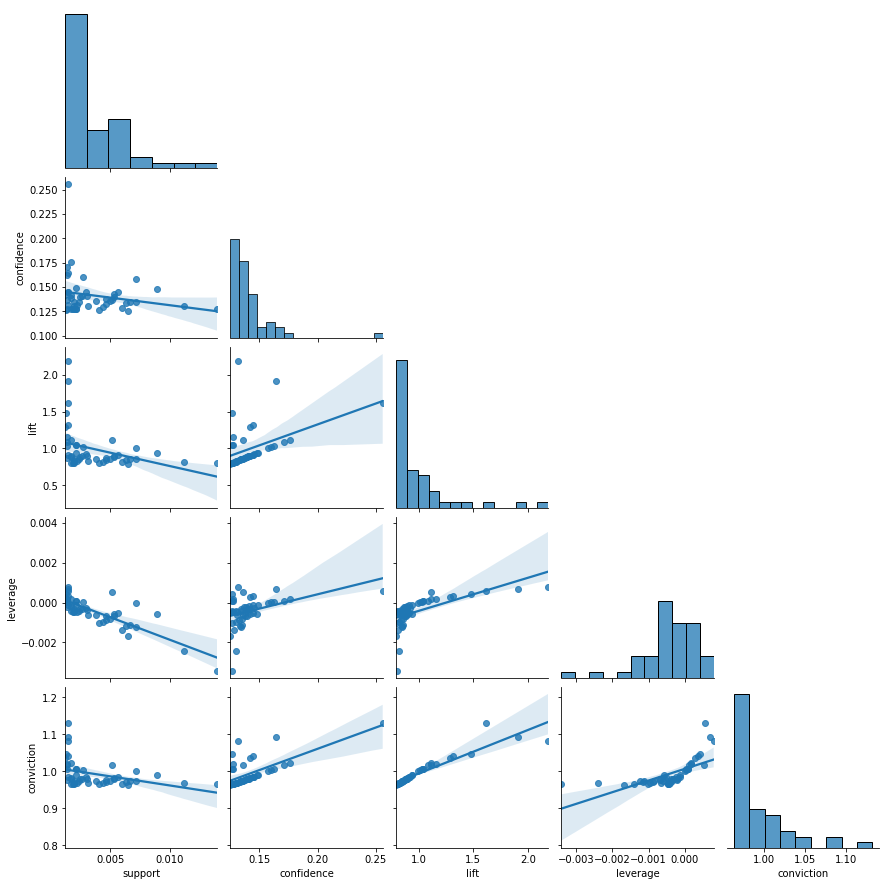

In [25]:
metrics = ['support', 'confidence', 'lift', 'leverage', 'conviction']
sns_plot = sns.pairplot(
    data=rules[metrics],
    kind='reg',
    corner=True
)
plt.show()